In [ ]:
#CHARGEMENT DU DATASET
import pandas as pd

df = pd.read_csv("data.csv", encoding="ISO-8859-1")

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
# TAILLE DU DATASET
df.shape

(541909, 8)

In [ ]:
# VOIR LES COLONNES
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='str')

In [12]:
# VOIR TYPES DE DONNEES
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  str    
 1   StockCode    541909 non-null  str    
 2   Description  540455 non-null  str    
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  str    
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  str    
dtypes: float64(2), int64(1), str(5)
memory usage: 33.1 MB


In [14]:
# ✅ Étape 4 — Statistiques générales
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [15]:
# ✅ Étape 5 — Vérification des valeurs manquantes
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

# 📊 DATA UNDERSTANDING — Compréhension approfondie des données

## 🎯 Contexte Business

Ce projet vise à analyser les performances commerciales d’une entreprise de commerce électronique à partir de données transactionnelles réelles. Chaque enregistrement correspond à une opération de vente réalisée par un client pour un ou plusieurs produits.

L’objectif principal consiste à transformer ces données brutes en informations exploitables permettant d’améliorer la prise de décision stratégique.

---

## 📁 Description générale du Dataset

Le dataset contient des informations détaillées sur :

- les factures (Invoice),
- les produits vendus,
- les quantités commandées,
- les prix unitaires,
- les clients,
- les pays d’origine des commandes.

Chaque ligne représente une transaction individuelle associée à une facture.

---

## 🔎 Structure des données analysées

Les principales variables étudiées incluent :

- **InvoiceNo** : identifiant unique de transaction.
- **Description** : nom ou description du produit.
- **Quantity** : nombre d’unités vendues.
- **UnitPrice** : prix unitaire du produit.
- **CustomerID** : identifiant client.
- **Country** : localisation géographique du client.

Ces variables permettent une analyse complète du comportement commercial et client.

---

## ⚠️ Observations initiales et anomalies potentielles

L’exploration préliminaire met en évidence plusieurs points critiques :

- Présence de valeurs manquantes dans certains identifiants clients.
- Existence de quantités négatives indiquant probablement des retours ou annulations de commandes.
- Variabilité importante des prix et quantités nécessitant une validation avant analyse.
- Données issues de multiples pays confirmant une activité commerciale internationale.

Ces éléments devront être traités lors de la phase de nettoyage des données.

---

## 📈 Opportunités d’analyse Business

Ce dataset offre plusieurs axes d’analyse stratégique :

- Identification des produits les plus rentables.
- Analyse du comportement d’achat des clients.
- Détection des retours produits et pertes potentielles.
- Analyse géographique des ventes.
- Identification des clients à forte valeur.

---

## 🧠 Importance pour la suite du projet

Une compréhension approfondie des données constitue une étape essentielle afin de :

- garantir la qualité des analyses futures,
- éviter les biais statistiques,
- assurer la fiabilité des recommandations business.

La prochaine étape consistera à effectuer un nettoyage rigoureux des données afin de corriger les incohérences et préparer les analyses exploratoires avancées.

---

⭐ Réalisé dans le cadre d’un projet d’analyse de données orienté prise de décision commerciale.

# 🧹 DATA CLEANING — Nettoyage et préparation des données

## 🎯 Objectif

Cette étape vise à améliorer la qualité des données avant toute analyse approfondie. Les données transactionnelles peuvent contenir des erreurs, des valeurs manquantes ou des incohérences pouvant fausser les résultats analytiques.

Les actions principales incluent :

- suppression des valeurs manquantes critiques,
- traitement des retours produits,
- correction des valeurs aberrantes,
- préparation des variables nécessaires à l’analyse business.

Un dataset propre garantit des analyses fiables et des recommandations pertinentes.

In [37]:
# Copie Securite
df_clean = df.copy()

In [38]:
# Suppression des lignes sans description produit 
df_clean = df_clean.dropna(subset=["Description"])

In [39]:
# Suppression de clients inconnus
df_clean = df_clean.dropna(subset=["CustomerID"])


In [40]:
# Suppression de quantites negatives
df_clean = df_clean[df_clean["Quantity"] > 0]

In [41]:
# Suppression des prix negatifs ou 0
df_clean = df_clean[df_clean["UnitPrice"] > 0]

In [42]:
# Creeation de colonne revenu
df_clean["Revenue"] = df_clean["Quantity"] * df_clean["UnitPrice"]

In [43]:
# Convertir data
df_clean["InvoiceDate"] = pd.to_datetime(df_clean["InvoiceDate"])

In [44]:
# Verification de resultat
df_clean.info()
df_clean.describe()

<class 'pandas.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  str           
 1   StockCode    397884 non-null  str           
 2   Description  397884 non-null  str           
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[us]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  str           
 8   Revenue      397884 non-null  float64       
dtypes: datetime64[us](1), float64(3), int64(1), str(4)
memory usage: 30.4 MB


,Quantity,InvoiceDate,UnitPrice,CustomerID,Revenue
count,397884.000000,397884,397884.000000,397884.000000,397884.000000
mean,12.988238,2011-07-10 23:41:23.511023,3.116488,15294.423453,22.397000
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000,0.001000
25%,2.000000,2011-04-07 11:12:00,1.250000,13969.000000,4.680000
50%,6.000000,2011-07-31 14:39:00,1.950000,15159.000000,11.800000
75%,12.000000,2011-10-20 14:33:00,3.750000,16795.000000,19.800000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000,168469.600000
std,179.331775,NaN,22.097877,1713.141560,309.071041


RESUME CLIENT
## ✅ Résultat du nettoyage

Après nettoyage :

- suppression des transactions incomplètes,
- exclusion des retours produits,
- correction des anomalies de prix,
- création d’un indicateur de chiffre d’affaires (Revenue).

Le dataset est désormais prêt pour l’analyse exploratoire et les recommandations business.

# 📈 ANALYSE BUSINESS — Performance commerciale

## 🎯 Objectif

Cette étape vise à transformer les données nettoyées en informations stratégiques permettant d’identifier :

- les produits les plus performants,
- les marchés les plus rentables,
- les tendances de vente dans le temps,
- les clients à forte valeur.

Les résultats permettront de proposer des recommandations commerciales basées sur des données réelles.

In [46]:
# TOP PRODUIT
top_products = (
    df_clean.groupby("Description")["Revenue"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_products

Description
PAPER CRAFT , LITTLE BIRDIE           168469.60
REGENCY CAKESTAND 3 TIER              142592.95
WHITE HANGING HEART T-LIGHT HOLDER    100448.15
JUMBO BAG RED RETROSPOT                85220.78
MEDIUM CERAMIC TOP STORAGE JAR         81416.73
POSTAGE                                77803.96
PARTY BUNTING                          68844.33
ASSORTED COLOUR BIRD ORNAMENT          56580.34
Manual                                 53779.93
RABBIT NIGHT LIGHT                     51346.20
Name: Revenue, dtype: float64

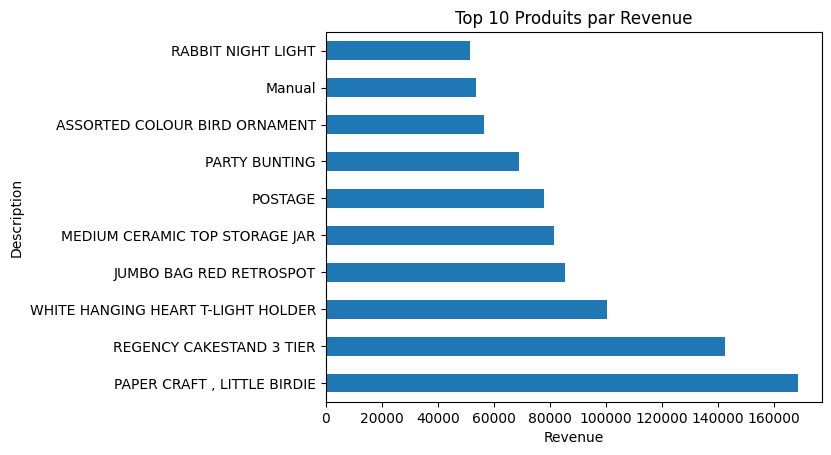

In [48]:
import matplotlib.pyplot as plt

top_products.plot(kind="barh")

plt.title("Top 10 Produits par Revenue")
plt.xlabel("Revenue")

plt.show()

In [50]:
# PAYS LE PLUS RENTABLE
top_countries = (
    df_clean.groupby("Country")["Revenue"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_countries

Country
United Kingdom    7308391.554
Netherlands        285446.340
EIRE               265545.900
Germany            228867.140
France             209024.050
Australia          138521.310
Spain               61577.110
Switzerland         56443.950
Belgium             41196.340
Sweden              38378.330
Name: Revenue, dtype: float64

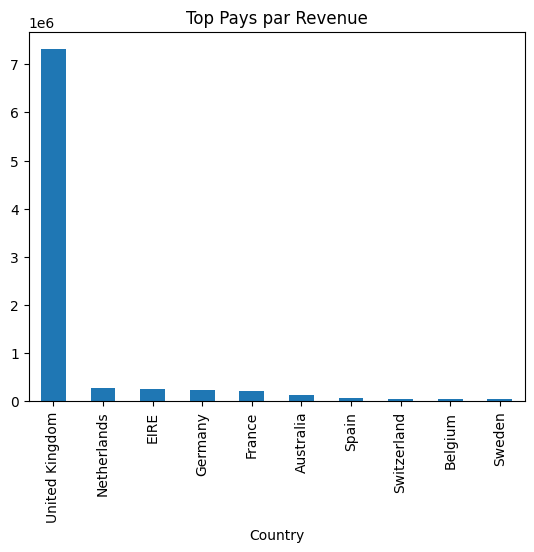

In [52]:
top_countries.plot(kind="bar")

plt.title("Top Pays par Revenue")

plt.show()

In [54]:
# VENTES MENSUELLES
df_clean["YearMonth"] = df_clean["InvoiceDate"].dt.to_period("M")

In [58]:
monthly_sales = (
    df_clean.groupby("YearMonth")["Revenue"]
    .sum()
)

monthly_sales

YearMonth
2010-12     572713.890
2011-01     569445.040
2011-02     447137.350
2011-03     595500.760
2011-04     469200.361
2011-05     678594.560
2011-06     661213.690
2011-07     600091.011
2011-08     645343.900
2011-09     952838.382
2011-10    1039318.790
2011-11    1161817.380
2011-12     518192.790
Freq: M, Name: Revenue, dtype: float64

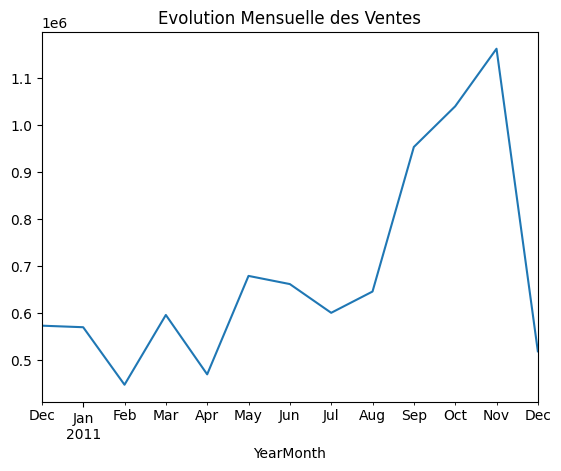

In [60]:
monthly_sales.plot()

plt.title("Evolution Mensuelle des Ventes")

plt.show()

In [63]:
# CLINTS VIP
top_clients = (
    df_clean.groupby("CustomerID")["Revenue"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_clients

CustomerID
14646.0    280206.02
18102.0    259657.30
17450.0    194550.79
16446.0    168472.50
14911.0    143825.06
12415.0    124914.53
14156.0    117379.63
17511.0     91062.38
16029.0     81024.84
12346.0     77183.60
Name: Revenue, dtype: float64

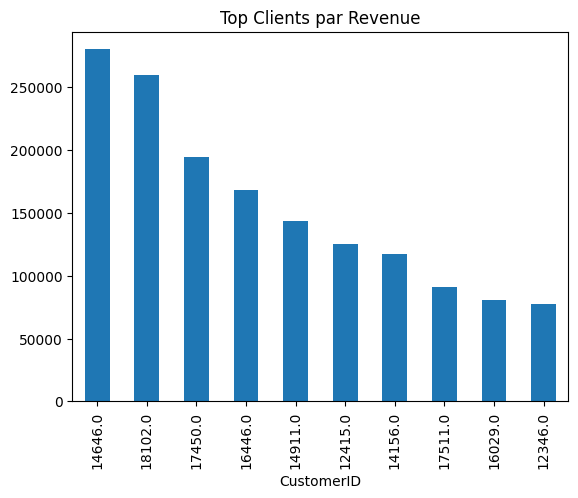

In [65]:
top_clients.plot(kind="bar")

plt.title("Top Clients par Revenue")

plt.show()

## 📊 Principaux résultats

L’analyse met en évidence plusieurs insights importants :

- certains produits génèrent une part significative du chiffre d’affaires,
- quelques pays dominent fortement les ventes,
- les performances commerciales varient selon les périodes,
- une minorité de clients contribue largement au revenu total.

Ces résultats permettent d’orienter les stratégies marketing et commerciales vers les segments les plus rentables.

# 💡 RECOMMANDATIONS STRATÉGIQUES — Projet E-commerce

## 🎯 Objectif

Transformer les insights tirés des données en recommandations concrètes permettant d’améliorer le chiffre d’affaires, la satisfaction client et l’efficacité marketing.

---

## 1️⃣ Optimisation du catalogue produit

- Focus sur les **10 produits les plus rentables**.
- Développer des promotions ou bundles autour de ces produits.
- Réduire ou réviser les produits à faible performance ou non vendus.

---

## 2️⃣ Stratégie géographique

- Concentrer les efforts marketing sur les **pays générant le plus de revenus**.
- Explorer des campagnes ciblées pour les pays à potentiel sous-exploité.
- Adapter les stocks et la logistique selon les marchés clés.

---

## 3️⃣ Gestion des retours et qualité produit

- Les **quantités négatives indiquent des retours** ; analyser les causes (produit défectueux, erreur de commande, etc.).
- Mettre en place un suivi pour réduire les retours et améliorer la satisfaction client.
- Identifier les produits avec taux de retour élevé et corriger les problèmes de qualité ou description.

---

## 4️⃣ Fidélisation des clients VIP

- Les **top clients représentent une part importante du chiffre d’affaires**.
- Mettre en place des programmes de fidélité, offres personnalisées et communications ciblées.
- Surveiller les habitudes d’achat pour anticiper les besoins et fidéliser.

---

## 5️⃣ Analyse temporelle et saisonnalité

- Exploiter les tendances mensuelles pour planifier promotions et stock.
- Identifier les périodes de pics de ventes pour renforcer la logistique.
- Préparer des campagnes marketing saisonnières ciblées.

---

## 6️⃣ Recommandations opérationnelles supplémentaires

- Nettoyer régulièrement le dataset pour garantir la qualité des analyses.
- Automatiser les rapports mensuels pour suivre les KPIs.
- Créer un dashboard interactif (Tableau, Power BI, ou Python/Plotly) pour visualiser les performances en temps réel.

---

## 🏆 Résultat attendu

Avec ces actions, l’entreprise pourra :

- augmenter le chiffre d’affaires,
- réduire les retours et erreurs,
- fidéliser les meilleurs clients,
- optimiser les opérations et la stratégie marketing.

---

